In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

Second order differential equations of the form $y'' = f(x,y,y')$ can be solved from 
$$\frac{d}{dx} \begin{pmatrix} y \\ u \end{pmatrix} = \begin{pmatrix} u \\ f(x,y,u) \end{pmatrix}$$

## At the Equator
### Evolution of $r$ with respect to $\tau$
$$\ddot{r} = \frac{h^2}{r^3} - \frac{3\mu h^2}{r^4} - \frac{\mu c^2}{r^2}$$
$$\frac{dR}{d\tau} = \frac{d}{d\tau} \begin{pmatrix} r \\ v \end{pmatrix} = \begin{pmatrix} v \\ f(\tau,r,v) \end{pmatrix} $$
### Evolution of $\phi$ with respect to $\tau$
$$\dot{\phi} = \frac{h}{r^2}$$
### Evolution of $t$ with respect to $\tau$
$$\dot{t} = k \left( 1 + \frac{2 \mu}{r} \right)^{-1}$$

In [2]:
M = 1
c = 5
G = 1
μ = G*M/(c**2)
h = 4*μ*c
k = 1

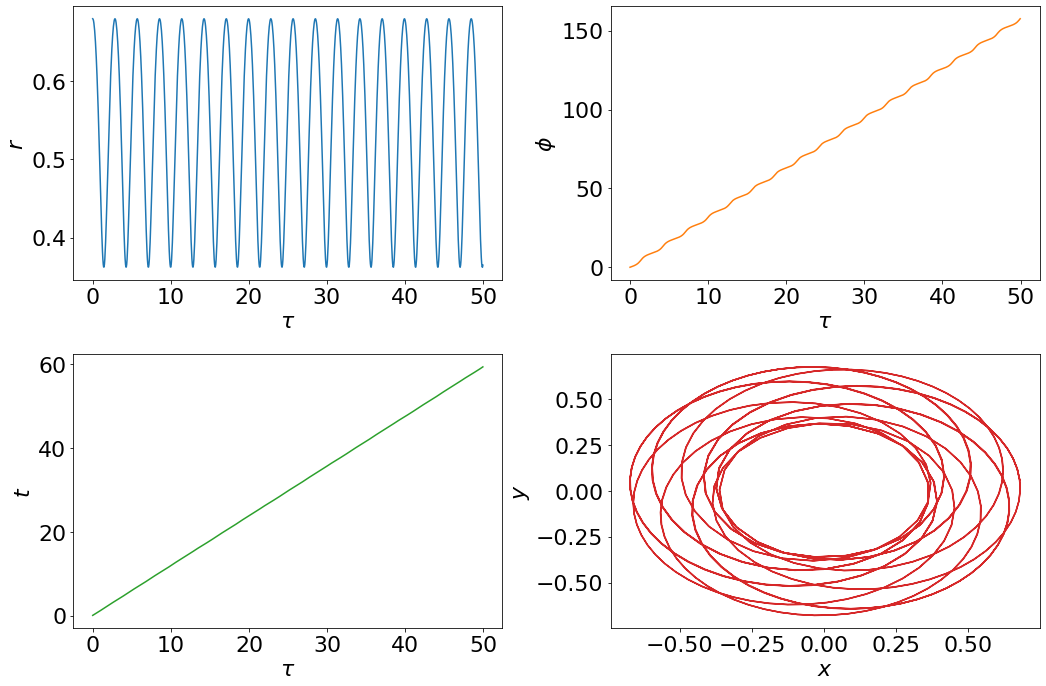

In [3]:
def F(R,τ,h=h,μ=μ,c=c):
    r, v = R
    return [v,h**2 / r**3 - 3*μ * h**2 / r**4 - μ * c**2 / r**2]

r0 = (h/(2*μ*c**2)) * (h + np.sqrt(h**2 - 12 * μ**2 * c**2)) + 0.2
v0 = 0
R0 = (r0,v0)

τ = np.linspace(0,50,1000)
sol = odeint(F,R0,τ)
r = sol.T[0]
ϕ = cumtrapz(h/r**2,τ)
t = cumtrapz(k/(1-2*μ/r),τ)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(τ, r)
axs[0, 0].set_xlabel(r"$\tau$")
axs[0, 0].set_ylabel(r"$r$")
axs[0, 1].plot(τ[0:-1],ϕ, 'tab:orange')
axs[0, 1].set_xlabel(r"$\tau$")
axs[0, 1].set_ylabel(r"$\phi$")
axs[1, 0].plot(τ[0:-1],t, 'tab:green')
axs[1, 0].set_xlabel(r"$\tau$")
axs[1, 0].set_ylabel(r"$t$")
axs[1, 1].plot(r[0:-1]*np.cos(ϕ),r[0:-1]*np.sin(ϕ), 'tab:red')
axs[1, 1].set_xlabel(r"$x$")
axs[1, 1].set_ylabel(r"$y$")
fig.tight_layout()
plt.savefig('2_first_orbits.png', format='png')

### Effective potential
* Newtonian
$$\frac12 \left( \frac{dr}{dt} \right)^2 + \underbrace{\frac{h^2}{2r^2} - \frac{\mu c^2}{r}}_{V_{\text{eff}}(r)} = E$$
* Relativistic
$$\frac12 \left( \frac{dr}{d\tau} \right)^2 + \underbrace{\frac{h^2}{2r^2} - \frac{\mu c^2}{r} - \frac{\mu h^2}{r^3}}_{V_{\text{eff}}(r)} = \frac{c^2}{2}(k^2-1)$$

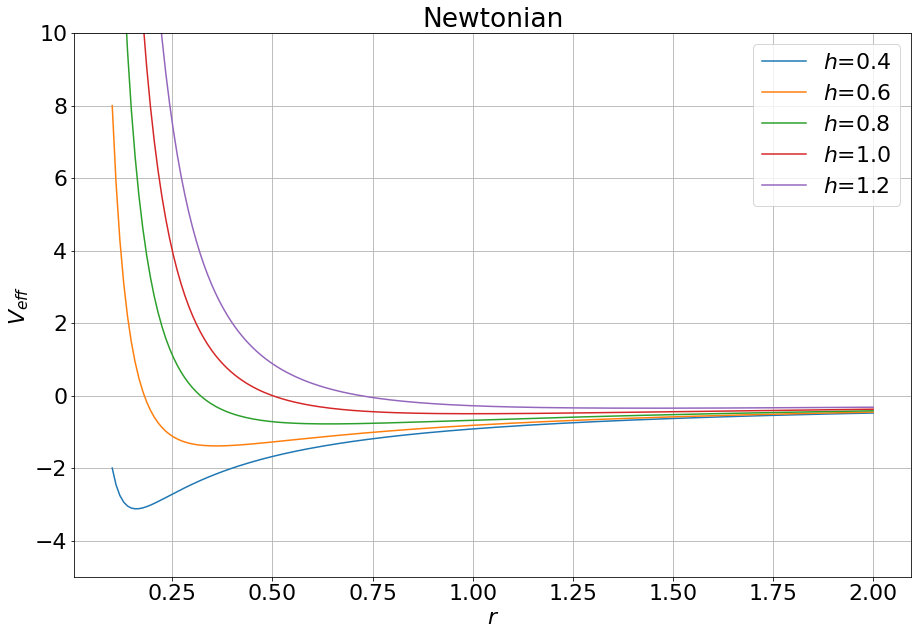

In [4]:
def V_eff(r,form,h=h,μ=μ,c=c):
    if form == "newtonian":
        return h**2 / (2 * r**2) - μ * c**2 / r 
    elif form == "relativistic":
        return h**2 / (2 * r**2) - μ * c**2 / r - μ * h**2 / r**3
    else:
        assert False
        
h = np.linspace(2*μ*c,6*μ*c,5)        
r = np.linspace(0.1,2,200)

for v in h:
    plt.plot(r,V_eff(r,form="newtonian",h=v))
   
plt.ylim(-5,10)
plt.grid()
plt.xlabel("$r$")
plt.ylabel("$V_{eff}$")
plt.title("Newtonian")
plt.legend(["$h$="+str(i) for i in h])
plt.savefig('2_veff_newton.png', format='png')

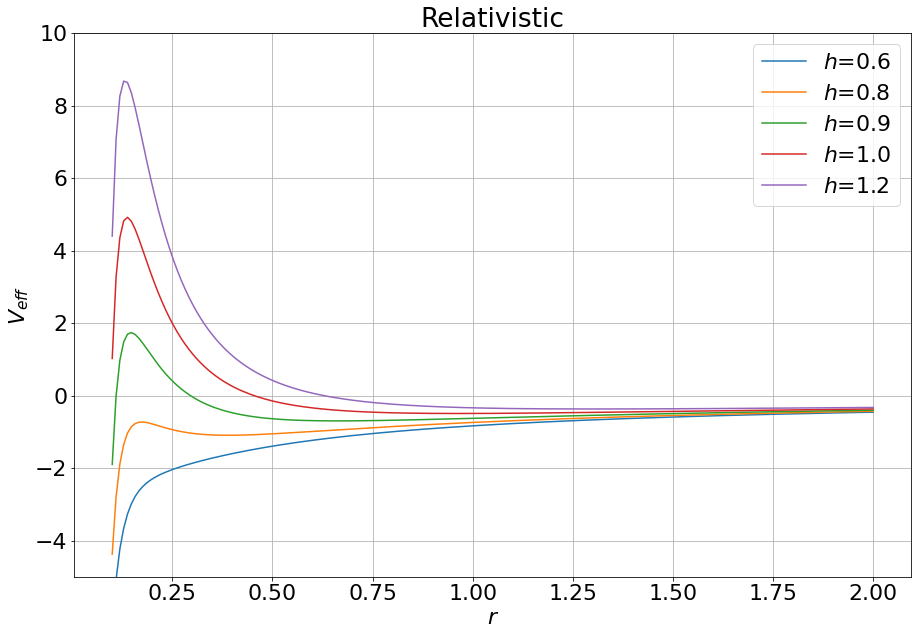

In [5]:
h = np.linspace(3*μ*c,6*μ*c,5)        
r = np.linspace(0.1,2,200)

for v in h:
    plt.plot(r,V_eff(r,form="relativistic",h=v))
   
plt.ylim(-5,10)
plt.grid()
plt.xlabel("$r$")
plt.ylabel("$V_{eff}$")
plt.title("Relativistic")
plt.legend(["$h$="+str(round(i,1)) for i in h])
plt.savefig('2_veff_relat.png', format='png')

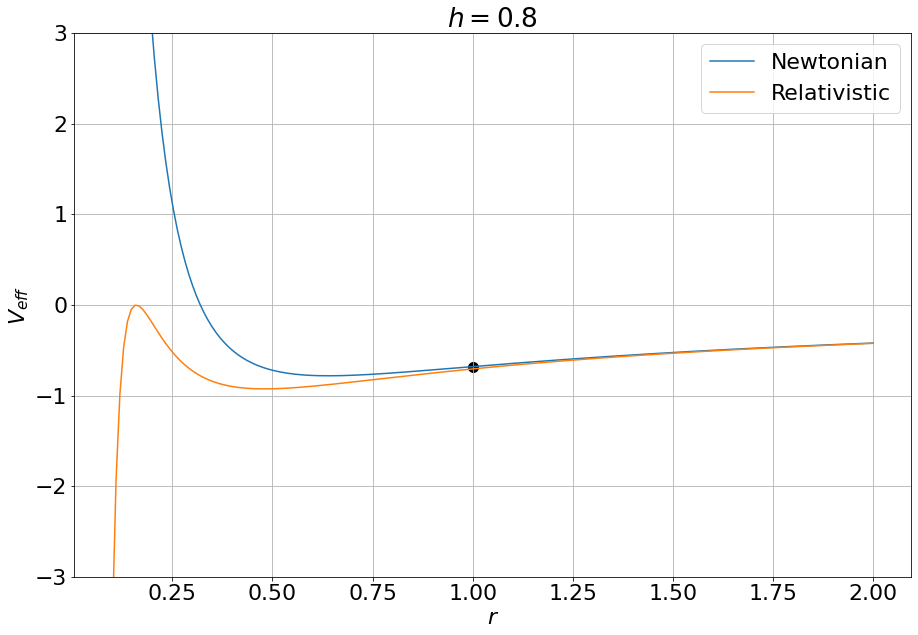

In [6]:
h = 4*μ*c    
r = np.linspace(0.1,2,200)

plt.plot(r,V_eff(r,form="newtonian",h=h))  
plt.plot(r,V_eff(r,form="relativistic",h=h))  
plt.scatter(1,V_eff(1,form="newtonian",h=h),color="black",marker="o",s=1e2)
plt.ylim(-3,3)
plt.grid()
plt.xlabel("$r$")
plt.ylabel("$V_{eff}$")
plt.legend(["Newtonian","Relativistic"])
plt.title("$h=$"+str(h))
plt.savefig('2_veff_newrel.png', format='png')

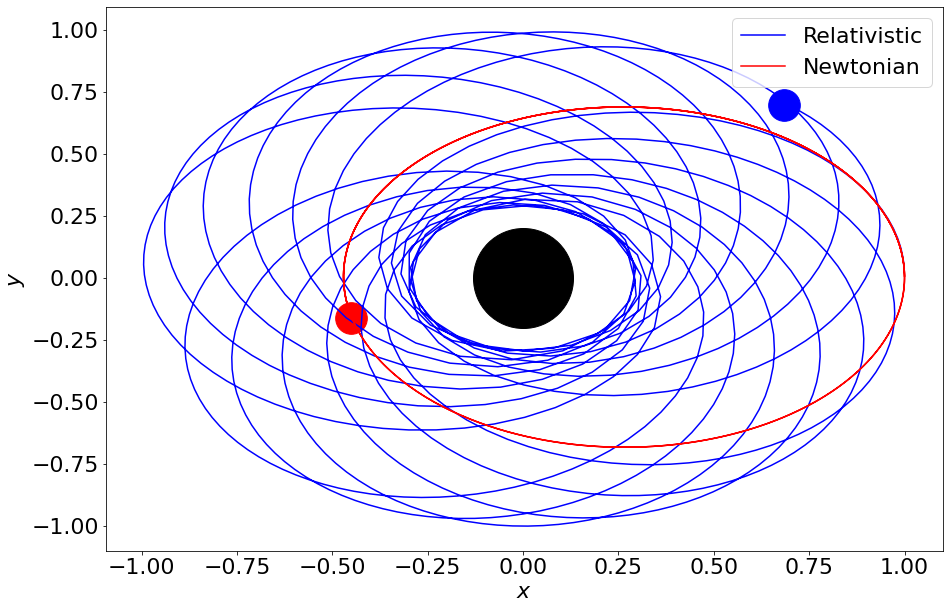

In [7]:
h = 4*μ*c  

def F_n(R,τ,h=h,μ=μ,c=c):
    r, v = R
    return [v,h**2 / r**3 - μ * c**2 / r**2]
    
def F_r(R,τ,h=h,μ=μ,c=c):
    r, v = R
    return [v,h**2 / r**3 - 3*μ * h**2 / r**4 - μ * c**2 / r**2]    

r0 = 1
v0 = 0
R0 = (r0,v0)

τ = np.linspace(0,10,1000)
sol_new = odeint(F_n,R0,τ)
r_new = sol_new.T[0]
ϕ_new = cumtrapz(h/r_new**2,τ)

τ = np.linspace(0,50,1000)
sol_rel = odeint(F_r,R0,τ)
r_rel = sol_rel.T[0]
ϕ_rel = cumtrapz(h/r_rel**2,τ)

plt.plot(r_rel[0:-1]*np.cos(ϕ_rel),r_rel[0:-1]*np.sin(ϕ_rel),color="blue")
plt.plot(r_new[0:-1]*np.cos(ϕ_new),r_new[0:-1]*np.sin(ϕ_new),color="red")
plt.scatter(0,0,color="black",s=1e4)
plt.scatter(r_new[-1]*np.cos(ϕ_new[-1]),r_new[-1]*np.sin(ϕ_new[-1]),color="red",s=1e3)
plt.scatter(r_rel[-1]*np.cos(ϕ_rel[-1]),r_rel[-1]*np.sin(ϕ_rel[-1]),color="blue",s=1e3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(["Relativistic","Newtonian"],loc="upper right")

plt.savefig('2_class_rel_orbit.png', format='png')

## Outside the Equator
$$\ddot{\theta} = -\frac{2}{r} \dot{r} \dot{\theta} + \frac{\cos \theta}{r^4 \sin^3 \theta} h^2 = f_\theta (r,\dot{r},\theta, \dot{\theta})$$

$$\ddot{r} = -\frac{\mu c^2 k^2}{r^2} + \left( 1 - \frac{2\mu}{r}\right)^{-1} \frac{\mu}{r^2}\dot{r}^2 + r^2 \dot{\theta}^2 + \frac{h^2}{r^2 \sin^2 \theta} = f_r (r,\dot{r},\theta, \dot{\theta}) $$

Then,

$$\frac{dS}{d\tau} = \frac{d}{d\tau} \begin{pmatrix} \theta \\ u_\theta \\ r \\ u_r \end{pmatrix} = \begin{pmatrix} u_\theta \\  f_\theta (r,\dot{r},\theta, \dot{\theta}) \\ u_r \\  f_r (r,\dot{r},\theta, \dot{\theta}) \end{pmatrix} = F(S,\tau)$$

In [152]:
M = 1
c = 5
G = 1
μ = G*M/(c**2)
h = 4*μ*c  
k = 1

def f_θ(r,rd,θ,θd,h=h):
    return -2*rd*θd/r + np.cos(θ) * h**2 / (r**4 * np.sin(θ)**3)

def f_r(r,rd,θ,θd,h=h,k=k,c=c,μ=μ):
    return -μ * c**2 * k**2 / r**2 + μ * rd**2 / ( (1-2*μ/r) * r**2 ) + r**2 * θd**2 + h**2 / (r**2 * np.sin(θ)**2)

def F(S,τ,h=h,k=k,c=c,μ=μ):
    θ, uθ, r, ur = S
    return [uθ,
           f_θ(r,ur,θ,uθ,h=h),
           ur,
           f_r(r,ur,θ,uθ,h=h,k=k,c=c,μ=μ)]

θ0 = 1
uθ0 = 0
r0 = 2
ur0 = 0
S0 = (θ0,uθ0,r0,ur0)

τ = np.linspace(0,10,100000)
sol = odeint(F,S0,τ)

θ = sol.T[0]
r = sol.T[2]
ϕ = cumtrapz(h / (np.sin(θ)**2 * r**2),τ)


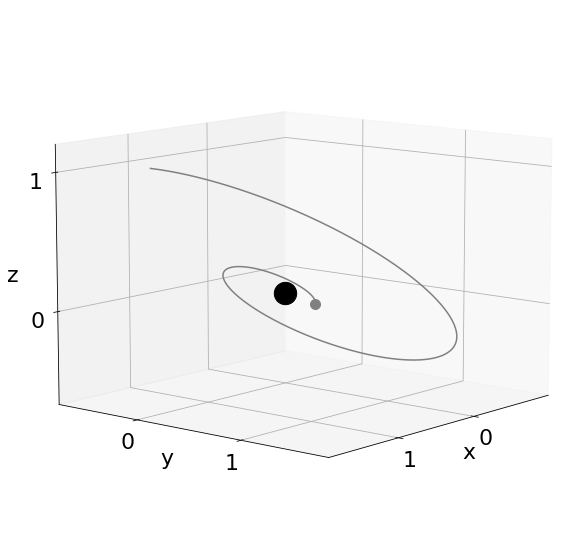

In [167]:
ax = plt.axes(projection='3d')
ax.plot3D(r[0:-1]*np.cos(ϕ)*np.sin(θ[0:-1]), r[0:-1]*np.sin(ϕ)*np.sin(θ[0:-1]), r[0:-1]*np.cos(θ[0:-1]), 'gray')
ax.scatter(r[-1]*np.cos(ϕ[-1])*np.sin(θ[-1]), r[-1]*np.sin(ϕ[-1])*np.sin(θ[-1]), r[-1]*np.cos(θ[-1]), s = 1e2 ,color='gray')
ax.scatter(0,0,s=5e2,color="black")
ax.set_xlabel("x")
ax.set_xticks([0,1])
ax.set_ylabel("y")
ax.set_yticks([0,1])
ax.set_zlabel("z")
ax.set_zticks([0,1])
ax.view_init(10, 40)
plt.savefig('2_gen_obit1.png', format='png')